In [2]:
#%pip install pandas jupyter

%pip install requests

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:


# Import pandas after installation
import pandas as pd
print(pd.__version__)
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2.2.3


Loading the dataset

In [4]:
import requests

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"File downloaded successfully as {filename}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
download(file_path, "survey_data.csv")

File downloaded successfully as survey_data.csv


======================================================|===========================================================

In [5]:
df=pd.read_csv("survey_data.csv")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


======================================================|===========================================================
Number of ROWS and COLUMNS

In [6]:
rows, cols= df.shape
print("The dataset has", rows, "rows, and", cols, "columns")

The dataset has 65437 rows, and 114 columns


Identifying the data type of each column

In [7]:
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Average age of the survey

In [8]:
age_mapping = {
    "Under 18 years old": 17,  
    "18-24 years old": 21,
    "25-34 years old": 29.5,
    "35-44 years old": 39.5,
    "45-54 years old": 49.5,
    "55-64 years old": 59.5,
    "65 years or older": 70,  
    "Prefer not to say": None  }

df['NewAge'] = df['Age'].map(age_mapping)

# Compute mean (ignoring NaN values)
print(df['NewAge'].mean())


33.047308607847654


Unique countries:

In [9]:
print(df['Country'].nunique())

185


============================MODULE 2 Data Wrangling========================

In [10]:
nb_dupes= df.duplicated().sum()
print(f"{nb_dupes} Duplicated rows")

0 Duplicated rows


In [11]:
df_info=df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 115 entries, ResponseId to NewAge
dtypes: float64(14), int64(1), object(100)
memory usage: 57.4+ MB


In [12]:
missing_values = df.isnull().sum()
summary = df.describe(include='all')
print(df_info)
print("\nMissing values per column:\n", missing_values)
print("\nSummary statistics:\n", summary)


None

Missing values per column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
NewAge                   322
Length: 115, dtype: int64

Summary statistics:
           ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000                             NaN              NaN   
std     18890.179119                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16360.0

In [13]:
unique_countries = df['Country'].unique()
print("Unique values in 'Country' column:\n", unique_countries)

inconsistent_countries = df[df['Country'].str.strip() == ''] 
print("\nInconsistent or missing countries:\n", inconsistent_countries)


Unique values in 'Country' column:
 ['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay

In [14]:
country_mapping = {
    'USA': 'United States',
    'United States of America': 'United States',
    'US': 'United States',
}

df['Country'] = df['Country'].replace(country_mapping)

ed_level_mapping = {
    'Bachelors': 'Bachelor\'s',
    'Master': 'Master\'s',
    'Phd': 'PhD',
}

df['EdLevel'] = df['EdLevel'].replace(ed_level_mapping)

# Verify the changes
print("\nStandardized 'Country' column:\n", df['Country'].unique())
print("\nStandardized 'EdLevel' column:\n", df['EdLevel'].unique())



Standardized 'Country' column:
 ['United States' 'United Kingdom of Great Britain and Northern Ireland'
 'Canada' 'Norway' 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria'
 'Switzerland' 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia'
 'Brazil' 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France'
 'Saudi Arabia' 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden'
 'Netherlands' 'Croatia' 'Pakistan' 'Czech Republic'
 'Republic of North Macedonia' 'Finland' 'Slovakia' 'Russian Federation'
 'Greece' 'Israel' 'Belgium' 'Mexico' 'United Republic of Tanzania'
 'Hungary' 'Argentina' 'Portugal' 'Sri Lanka' 'Latvia' 'China' 'Singapore'
 'Lebanon' 'Spain' 'South Africa' 'Lithuania' 'Viet Nam'
 'Dominican Republic' 'Indonesia' 'Kosovo' 'Morocco' 'Taiwan' 'Georgia'
 'San Marino' 'Tunisia' 'Bangladesh' 'Nigeria' 'Liechtenstein' 'Denmark'
 'Ecuador' 'Malaysia' 'Albania' 'Azerbaijan' 'Chile' 'Ghana' 'Peru'
 'Bolivia' 'Egypt' 'Luxembourg' 'Montenegro' 'Cyprus' 'Paraguay'
 'Kazakhstan'

In [15]:
df_encoded = pd.get_dummies(df, columns=['Employment'], drop_first=True) 
print("\nOne-hot encoded 'Employment' column:\n", df_encoded.head())


One-hot encoded 'Employment' column:
    ResponseId                      MainBranch                 Age RemoteWork  \
0           1  I am a developer by profession  Under 18 years old     Remote   
1           2  I am a developer by profession     35-44 years old     Remote   
2           3  I am a developer by profession     45-54 years old     Remote   
3           4           I am learning to code     18-24 years old        NaN   
4           5  I am a developer by profession     18-24 years old        NaN   

    Check                                   CodingActivities  \
0  Apples                                              Hobby   
1  Apples  Hobby;Contribute to open-source projects;Other...   
2  Apples  Hobby;Contribute to open-source projects;Other...   
3  Apples                                                NaN   
4  Apples                                                NaN   

                                             EdLevel  \
0                          Primary/elem

In [16]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("\nColumns with the highest number of missing values:\n", missing_columns)



Columns with the highest number of missing values:
 RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
NewAge                   322
Length: 110, dtype: int64


In [ ]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Fill missing values in numerical columns with the median
for col in num_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical columns with the mode
for col in cat_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

# Optional: Recheck to confirm no missing values remain
missing_after = df.isnull().sum()
print("Remaining missing values (should be 0 for all columns):\n", missing_after[missing_after > 0])


Remaining missing values (should be 0 for all columns):
 Series([], dtype: int64)


In [21]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("\nColumns with the highest number of missing values:\n", missing_columns)
df


Columns with the highest number of missing values:
 Series([], dtype: int64)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,NewAge
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,17.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,39.5
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,49.5
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,15.0,10.0,5.0,0.0,0.0,Too long,Easy,65000.0,7.0,21.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,15.0,10.0,5.0,0.0,0.0,Too short,Easy,65000.0,7.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",Technical documentation;Blogs;Written Tutorial...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,21.0
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,29.5
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,29.5
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,21.0


In [29]:
import numpy as np

# Create a copy of just the numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

df_std = df[numerical_cols].copy()

# Standardize each numerical column
for col in df_std.columns:
    mean = df_std[col].mean()
    std = df_std[col].std()
    df_std[col] = (df_std[col] - mean) / std

# Optional: check the result
print(df_std.describe())


         ResponseId     CompTotal       WorkExp  JobSatPoints_1  \
count  6.543700e+04  6.543700e+04  6.543700e+04    6.543700e+04   
mean   5.559513e-17  3.148943e-18  1.007662e-16    6.949392e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00    1.000000e+00   
min   -1.732011e+00 -3.909204e-03 -1.607702e+00   -7.735570e-01   
25%   -8.660056e-01 -3.909204e-03 -1.776588e-01   -2.148469e-01   
50%    0.000000e+00 -3.909204e-03 -1.776588e-01   -2.148469e-01   
75%    8.660056e-01 -3.909204e-03 -1.776588e-01   -2.148469e-01   
max    1.732011e+00  2.558027e+02  6.336983e+00    4.813545e+00   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    65437.000000    6.543700e+04    6.543700e+04    6.543700e+04   
mean         0.000000    4.169635e-17   -2.084818e-17    8.686740e-17   
std          1.000000    1.000000e+00    1.000000e+00    1.000000e+00   
min         -0.261894   -2.923108e-01   -1.199646e+00   -1.001729e+00   
25%         -0.261894   -2.9231

In [35]:
#data wrangling:
print(df.columns.tolist())


['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [43]:
import numpy as np

# Assuming your dataframe is already loaded as 'df'

# Step 1: Drop unnecessary columns (adjust according to your needs)
df = df.drop(columns=['ResponseId', 'Check', 'SurveyEase'], errors='ignore')

# Step 2: Handle missing values
# For numerical columns, fill with the median
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Step 3: Encode categorical columns manually
# Label encoding for ordinal categorical variables (example: 'Employment')
# We assume 'Employment' has a few distinct categories, and we will manually map them
employment_mapping = {value: idx for idx, value in enumerate(df['Employment'].unique())}
df['Employment'] = df['Employment'].map(employment_mapping)

# One-Hot Encoding for nominal categorical variables (example: 'MainBranch', 'DevType')
# Manually creating one-hot encoding
df = pd.concat([df, pd.get_dummies(df['MainBranch'], prefix='MainBranch', drop_first=True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['DevType'], prefix='DevType', drop_first=True)], axis=1)

# Drop the original columns after one-hot encoding
df = df.drop(columns=['MainBranch', 'DevType'], errors='ignore')

# Step 4: Feature Engineering (Optional, based on your needs)
# Example: Create 'YearsExperience' from 'WorkExp' (assuming 'WorkExp' is in months)
df['YearsExperience'] = df['WorkExp'] / 12  # WorkExp is assumed to be in months

# Example: Calculate average job satisfaction score from multiple columns
df['AvgJobSat'] = df[['JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6']].mean(axis=1)

age_mapping = {
    'Under 18': 15,
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65 or older': 70,
    'Prefer not to say': np.nan
}

df['NewAge'] = df['Age'].map(age_mapping)

# Step 5: Standardize numerical columns (mean=0, std=1) without sklearn
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = (df[col] - mean) / std

# Step 6: Min-Max Scaling manually (for 'WorkExp' as an example)
# Min-Max Scaling (0 to 1)
min_val = df['WorkExp'].min()
max_val = df['WorkExp'].max()
df['WorkExp'] = (df['WorkExp'] - min_val) / (max_val - min_val)

# Step 7: Verify the changes
# Print the first few rows of the cleaned and wrangled DataFrame
print(df.head())


KeyError: 'MainBranch'

In [41]:
job_sat_columns = [col for col in df.columns if 'JobSatPoints' in col]

# Calculate the average job satisfaction column by taking the mean across the JobSatPoints columns
df['JobSatAverage'] = df[job_sat_columns].mean(axis=1)

# Drop all the JobSatPoints columns except for the 'JobSatAverage'
df = df.drop(columns=job_sat_columns)

=================================================

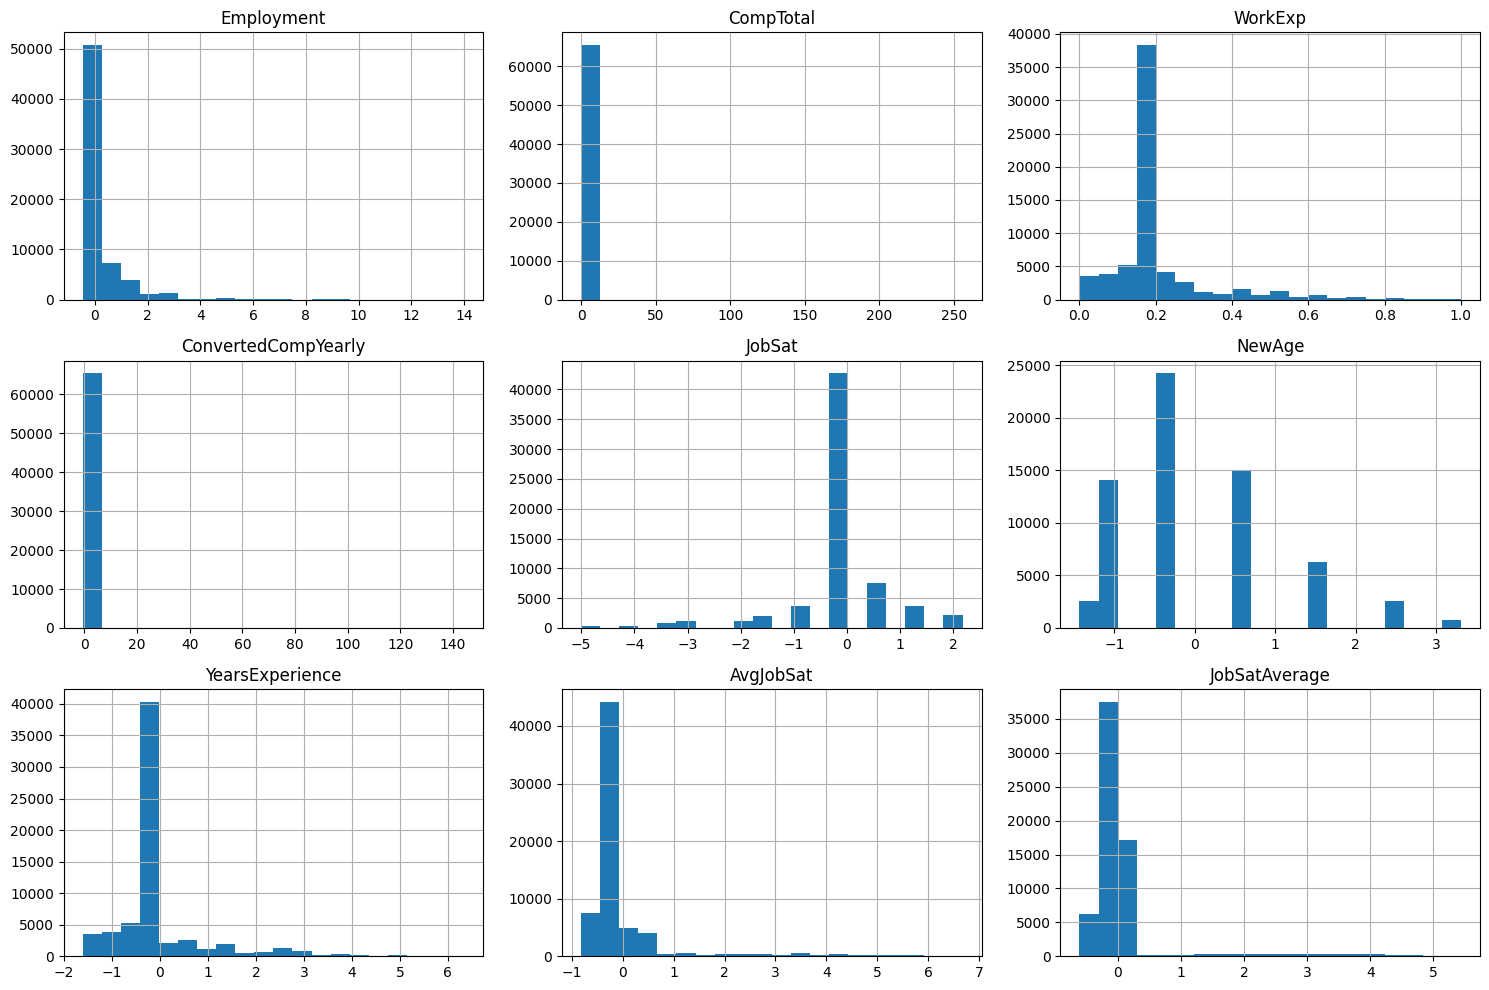

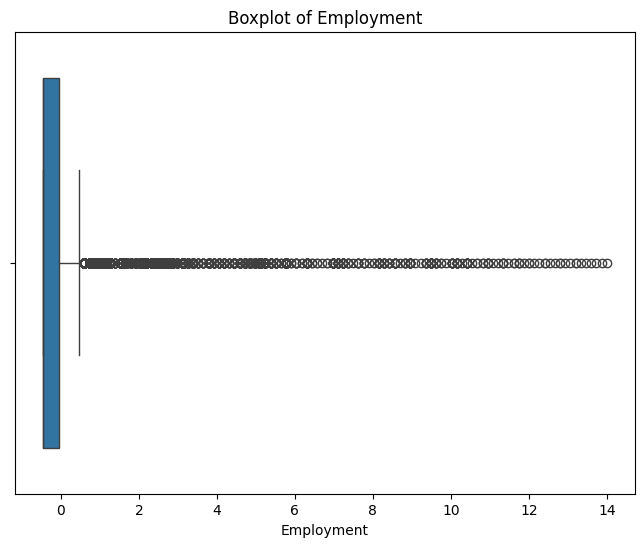

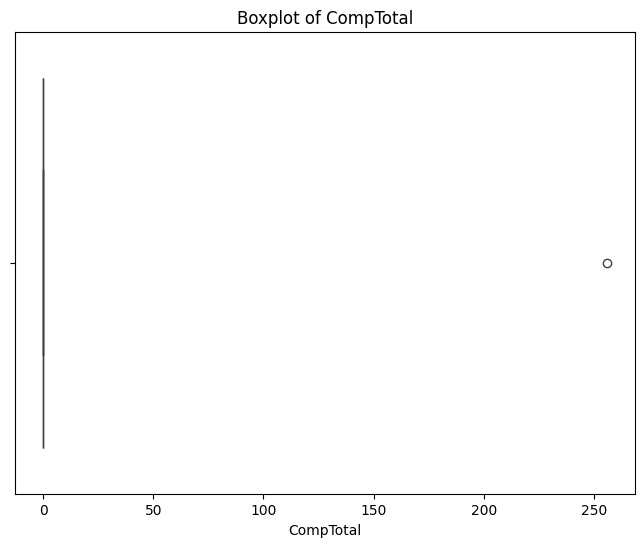

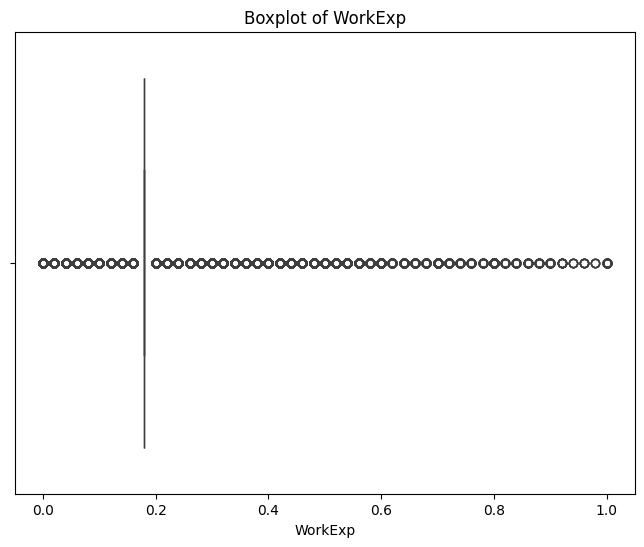

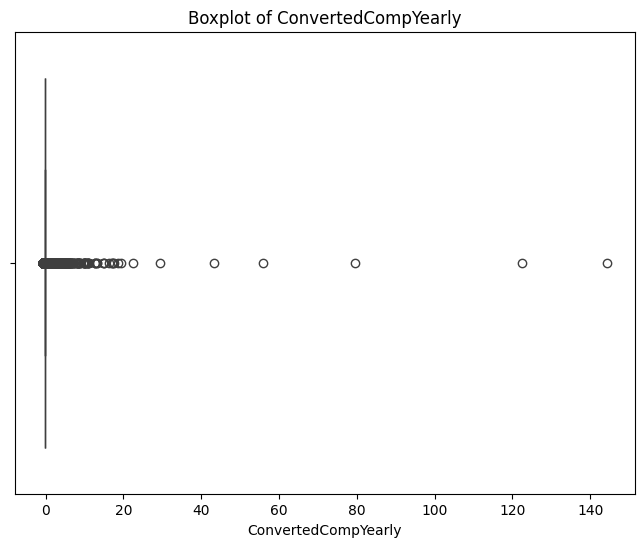

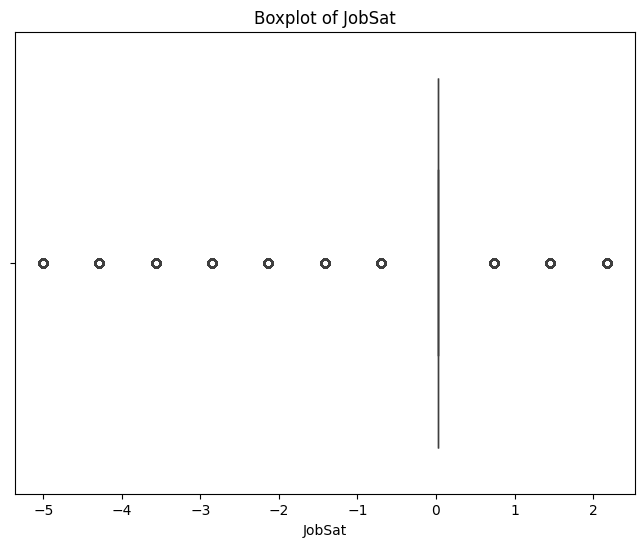

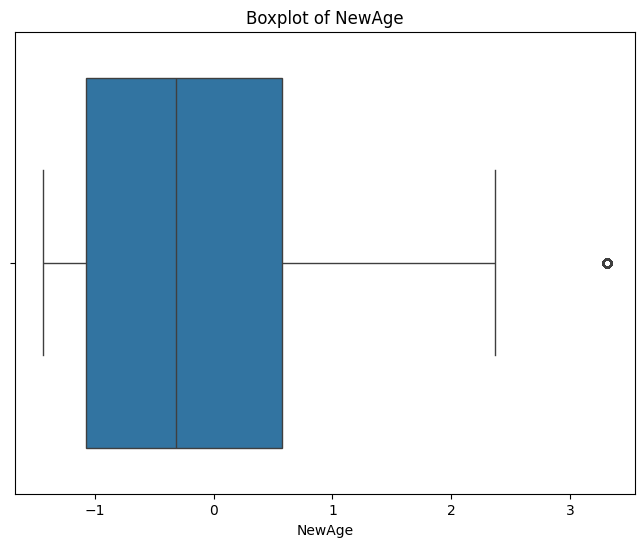

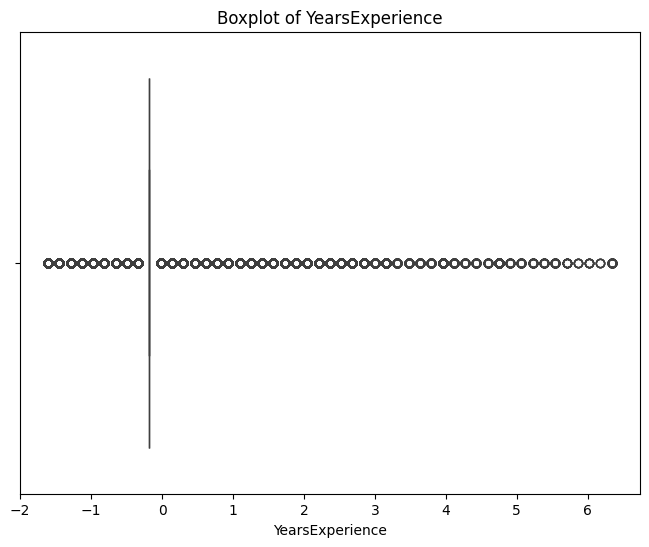

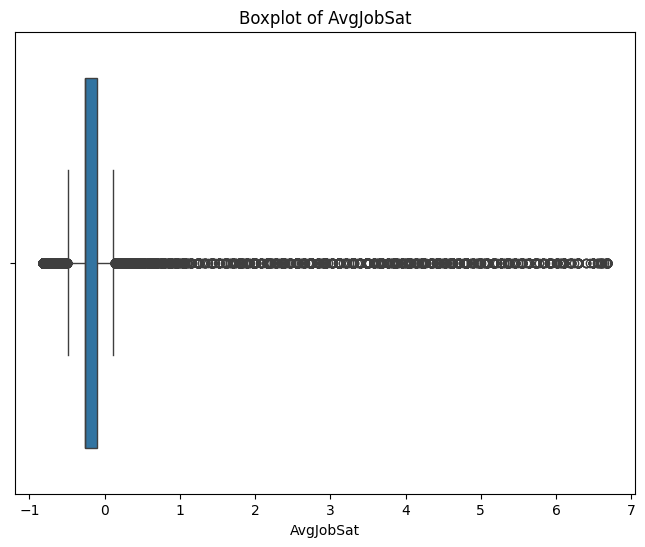

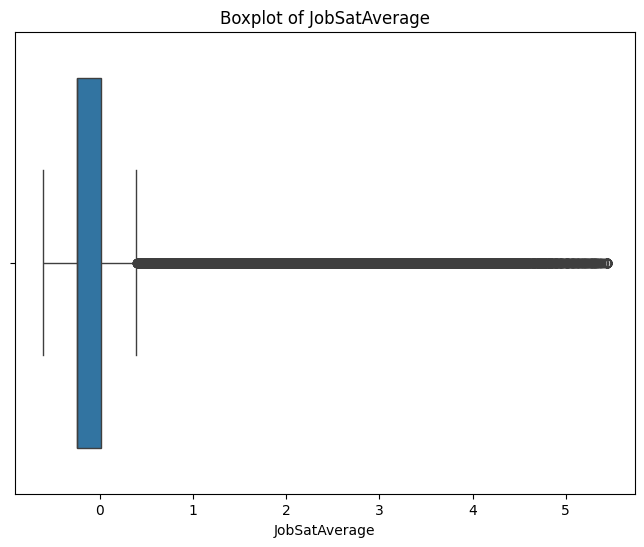

In [42]:
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots to visualize the distribution and detect outliers for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

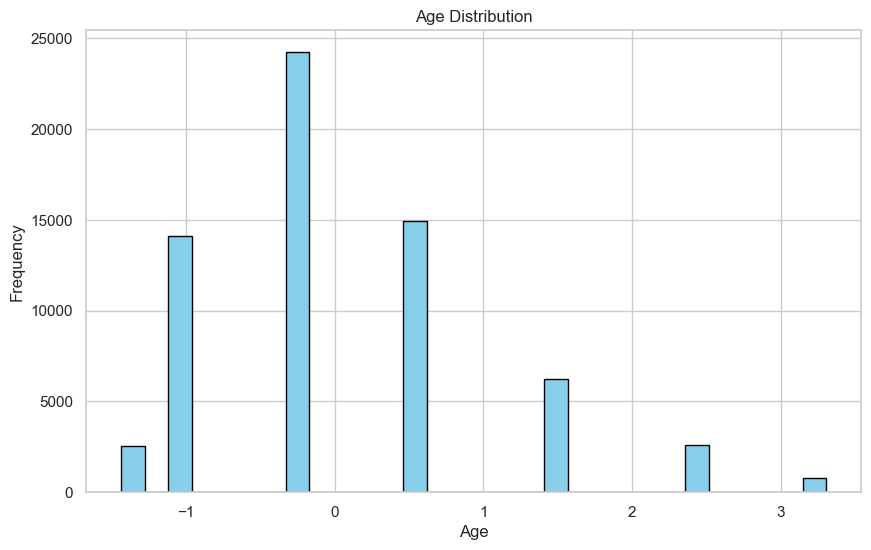

In [46]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

import seaborn as sns
df['NewAge'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black', title='Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


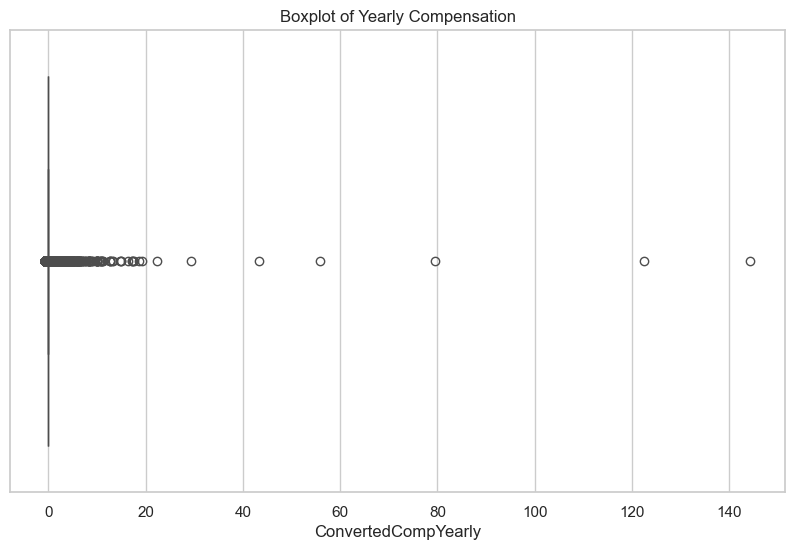

In [49]:
sns.boxplot(x=df['ConvertedCompYearly'], color='orange')
plt.title('Boxplot of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.show()


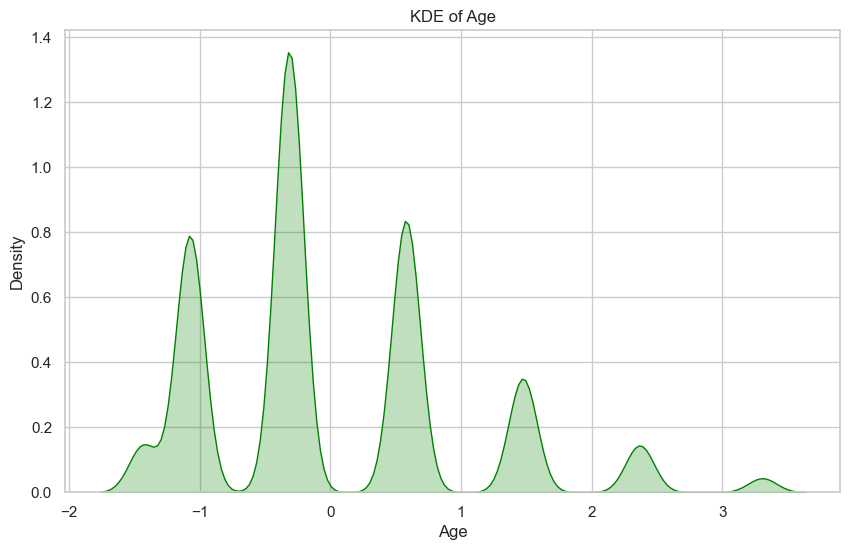

In [48]:
sns.kdeplot(df['NewAge'], fill=True, color='green')
plt.title('KDE of Age')
plt.xlabel('Age')
plt.show()


========== Categorial Data ==================

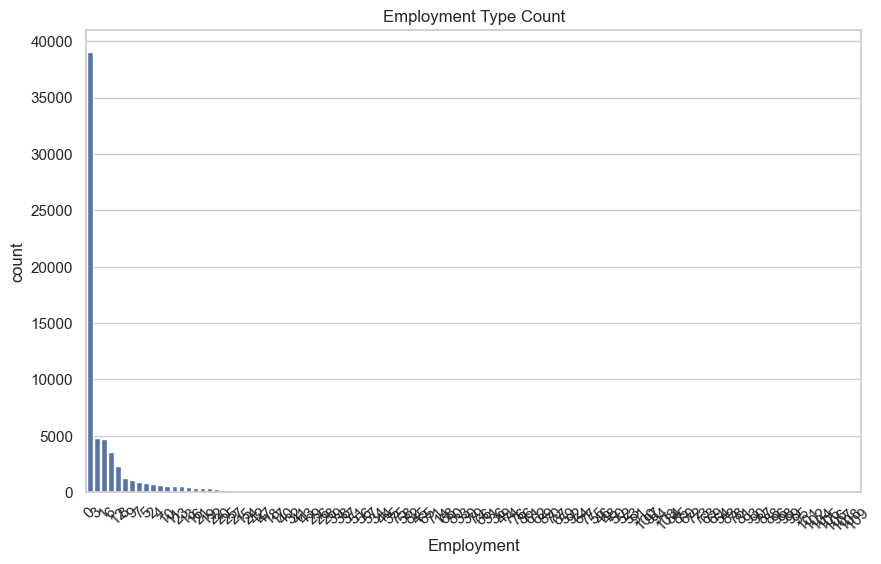

In [50]:
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.title('Employment Type Count')
plt.xticks(rotation=45)
plt.show()


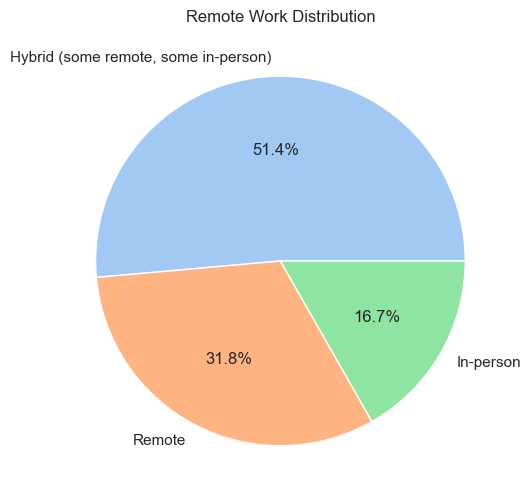

In [51]:
df['RemoteWork'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title('Remote Work Distribution')
plt.ylabel('')
plt.show()


================== Correlation ============

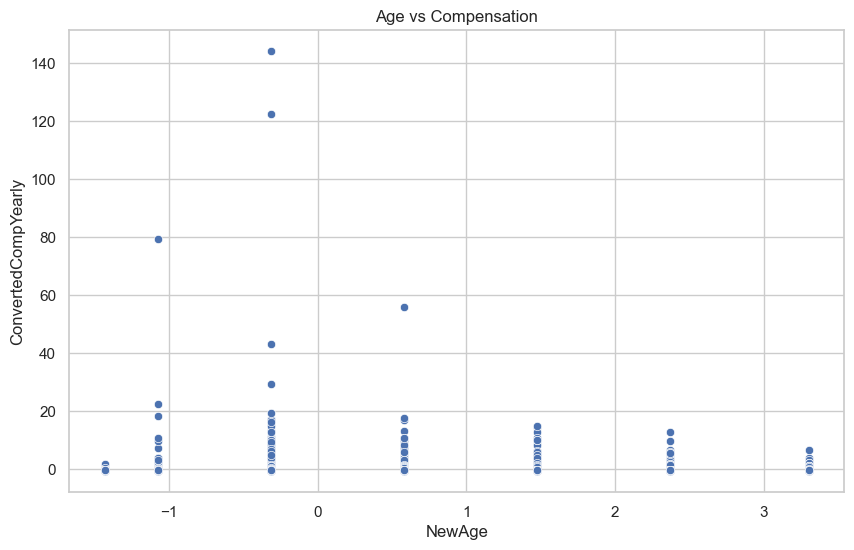

In [52]:
sns.scatterplot(x='NewAge', y='ConvertedCompYearly', data=df)
plt.title('Age vs Compensation')
plt.show()


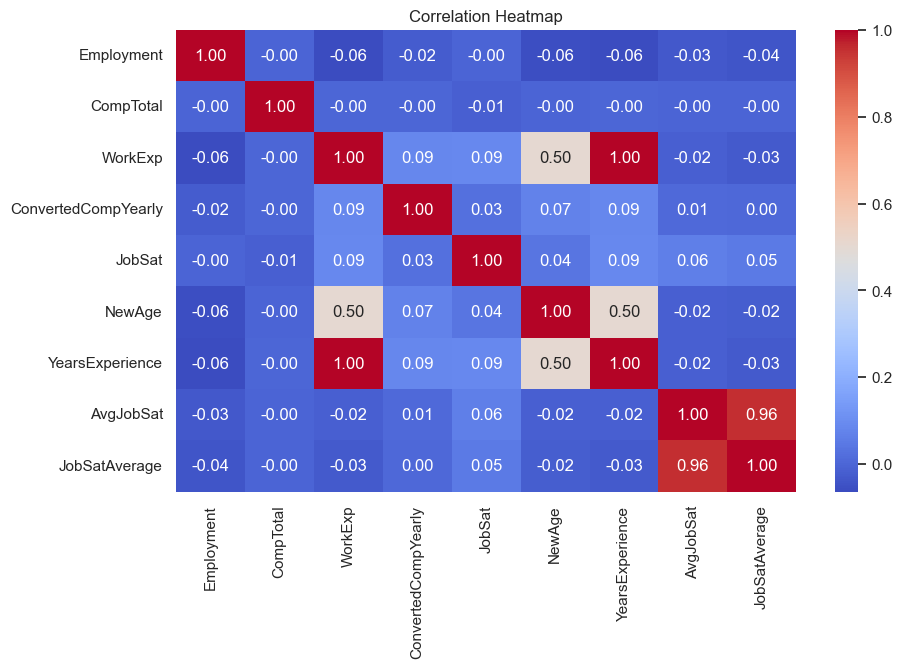

In [53]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [54]:
#Line Chart

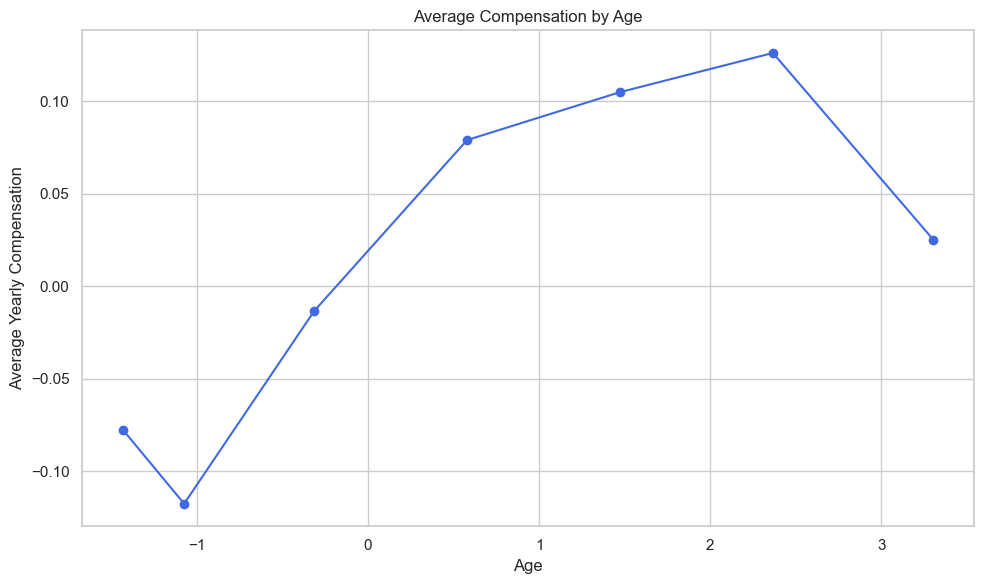

In [55]:
# Group data by NewAge and calculate average compensation
age_comp = df.groupby('NewAge')['ConvertedCompYearly'].mean().reset_index()

# Sort by age
age_comp = age_comp.sort_values('NewAge')

# Plot
plt.plot(age_comp['NewAge'], age_comp['ConvertedCompYearly'], marker='o', linestyle='-', color='royalblue')
plt.title('Average Compensation by Age')
plt.xlabel('Age')
plt.ylabel('Average Yearly Compensation')
plt.grid(True)
plt.tight_layout()
plt.show()
